In [40]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
import plotly.express as px


In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.columns = ['CustomerID', 'Gender', 'Age','Income','Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Classify Similar customers on basis of Income and Spend

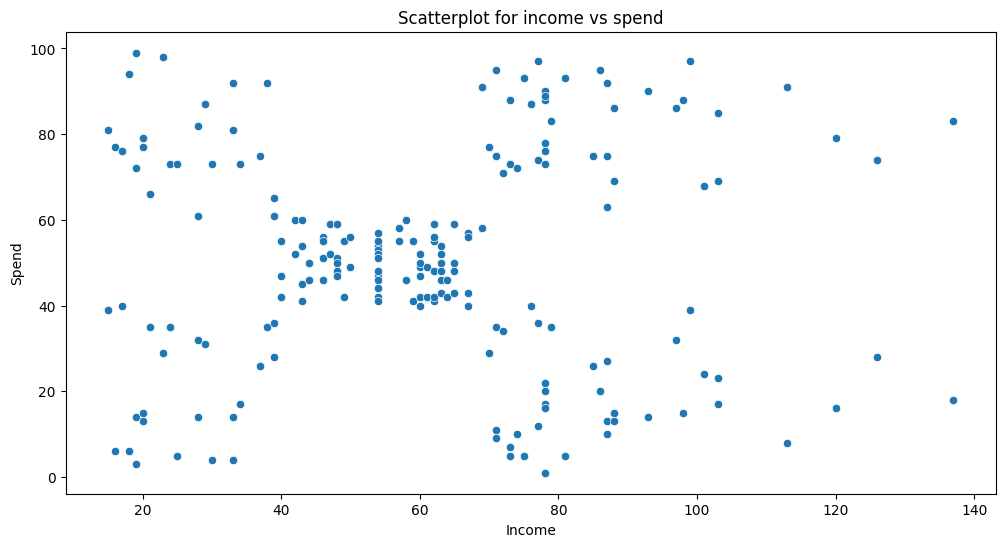

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Scatterplot for income vs spend')
plt.show()

### Seperate x value from your data

In [12]:
x = df[['Income','Spend']]
x.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [15]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### For Kmean method find Optimal value of K with Elbow method

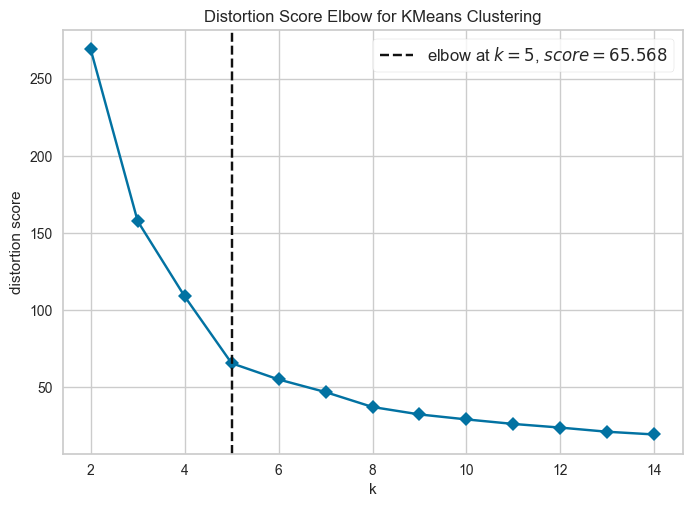

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [17]:
kelbow_visualizer(KMeans(),
                  x_pre,
                  k=(2,15),
                  timings=False)

### Create a KMeans model with number of clusters as 5

In [18]:
model = KMeans(n_clusters=5)
model.fit(x_pre)

KMeans(n_clusters=5)

In [19]:
model.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [20]:
x.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
x['Label']=model.labels_

In [22]:
x

,Income,Spend,Label
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [23]:
x['Label'].unique()

array([1, 4, 0, 3, 2])

In [24]:
x[x['Label']==0]

,Income,Spend,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [25]:
x[x['Label']==1]

,Income,Spend,Label
0,15,39,1
2,16,6,1
4,17,40,1
6,18,6,1
8,19,3,1
10,19,14,1
12,20,15,1
14,20,13,1
16,21,35,1
18,23,29,1


### Visualize above Clusters

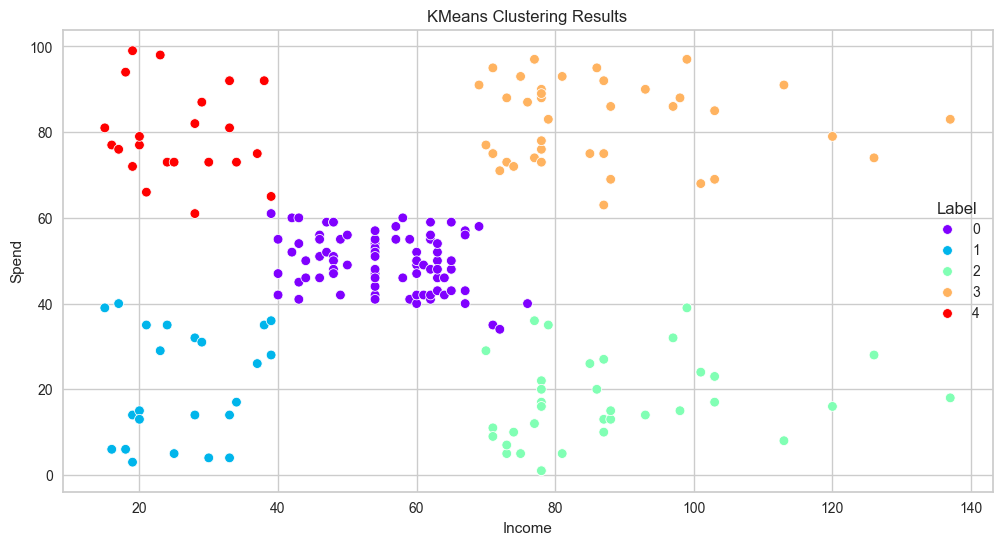

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=x, x='Income', y='Spend', hue='Label', palette='rainbow')
plt.title('KMeans Clustering Results')
plt.show()

### Cluster Similar customers on basis of age, income and Spending

In [27]:
x2 = df[['Age','Income','Spend']]
x2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [28]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')

In [29]:
x2_pre = num_pipe2.fit_transform(x2)
x2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


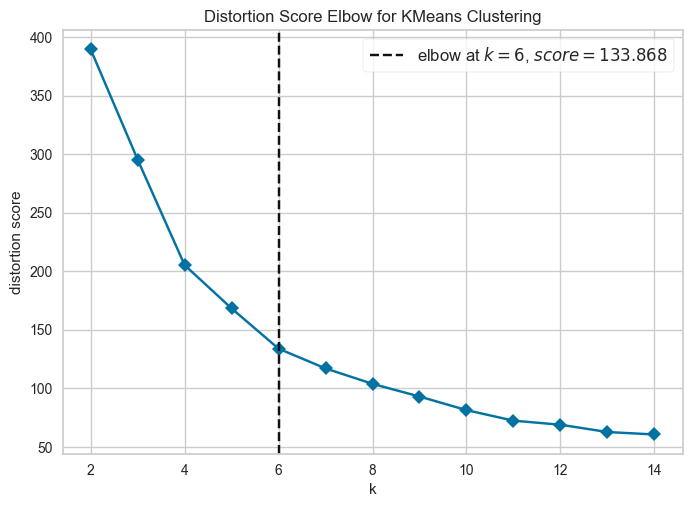

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [31]:
kelbow_visualizer(KMeans(),
                  x2_pre,
                  k=(2, 15),
                  timings=False)

In [32]:
model2 = KMeans(n_clusters=6)
model2.fit(x2_pre)

KMeans(n_clusters=6)

In [33]:
model2.labels_

array([5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [34]:
x2['Label'] = model2.labels_

In [35]:
x2.head()

,Age,Income,Spend,Label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


In [36]:
x2['Label'].unique()

array([5, 4, 1, 0, 2, 3])

In [38]:

for i in range(6):
    print(f'Cluster Number : {i}\n')
    display(x2[x2['Label']==i])
    print('\n=====================================================\n')

Cluster Number : 0



,Age,Income,Spend,Label
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0
68,19,48,59,0




Cluster Number : 1



,Age,Income,Spend,Label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster Number : 2



,Age,Income,Spend,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster Number : 3



,Age,Income,Spend,Label
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
138,19,74,10,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3




Cluster Number : 4



,Age,Income,Spend,Label
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




Cluster Number : 5



,Age,Income,Spend,Label
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


In [39]:
%pip install plotly nbformat

  Using cached plotly-5.18.0-py3-none-any.whl (15.6 MB)
     ---------------------------------------- 0.0/77.6 kB ? eta -:--:--
     --------------- ------------------------ 30.7/77.6 kB ? eta -:--:--
     ----------------------------------- -- 71.7/77.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 77.6/77.6 kB 724.2 kB/s eta 0:00:00
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
     ---------------------------------------- 0.0/84.7 kB ? eta -:--:--
     ----------------------------- ---------- 61.4/84.7 kB ? eta -:--:--
     ------------------------------------ - 81.9/84.7 kB 770.8 kB/s eta 0:00:01
     -------------------------------------- 84.7/84.7 kB 682.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/195.7 kB ? eta -:--:--
     ----------------------- -------------- 122.9/195.


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\user5\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Visualize the 3d scatterplot for clustering

In [43]:
fig = px.scatter_3d(data_frame=x2, x='Age', y='Income', z="Spend", color='Label')
fig.show()